### SC62421_Hastialisna Hurul Aeni Setiawan
Data: [Heart Disease](https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset/data)

1. Peserta mampu melakukan determinasi machine learning model mana yang relevan sesuai dengan dataset yang telah dipilih dengan problem understanding yang telah dilakukan sebelumnya.
2. Peserta mampu menyajikan alasan penggunaan machine learning model pada poin 1.
3. Peserta dapat melakukan eksekusi coding machine learning model yang telah ditentukan pada poin 1 dengan tepat sesuai urutan yang tepat.
4. Peserta mampu menerapkan cross-validation basic dari machine learning model yang telah dibuat sebelumnya.
5. Peserta dapat menjelaskan hasil dari cross-validation basic yang telah dihasilkan sebelumnya pada poin 4.
6. Peserta mampu menerapkan learning curves dari machine learning model yang telah dibuat sebelumnya serta membuat visualisasi hasil dari learning curves yang dihasilkan.
7. Peserta dapat menjelaskan hasil dari visualisasi learning curves yang telah dihasilkan sebelumnya pada poin 6.
8. Peserta mampu memperbaiki akurasi machine learning modul yang telah dibuat menggunakan hyperparameter tuning dan juga bootstrapping, jika ada.
9. Peserta dapat mengukur model yang dibuat dengan metric evaluation yang sesuai dengan machine learning model yang telah dibuat sebelumnya dan yang terbaik untuk menyelesaikan masalah.
10. Peserta dapat memberikan interpretasi dari hasil metric evaluation serta alasan pemilihan metric yang dipilih pada poin 9.

## Data Preprocessing

In [ ]:
# Import Library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Input data
file_id = '1PXy6pJyNlZzSp8Bdijo_eEhu6hzI39vk'
url = f'https://drive.google.com/uc?id={file_id}'

raw_data = pd.read_csv(url)
raw_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


**Variable Descriptions**
* age: age in years
* sex: sex (1 = male; 0 = female)
* cp: chest pain type
* trestbps: resting blood pressure (in mm Hg on admission to the hospital)
* chol: serum cholestoral in mg/dl
* fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
* restecg: resting electrocardiographic results
* thalach: maximum heart rate achieved
* exang: exercise induced angina (1 = yes; 0 = no)
* oldpeak = ST depression induced by exercise relative to rest
* slope: the slope of the peak exercise ST segment- Value 1: upsloping, Value 2: flat, Value 3: downsloping
* ca: number of major vessels (0–3) colored by flourosopy
* thal: 1 = normal; 2 = fixed defect; 3 = reversable defect
* target: 1 = disease, 0 = no disease

In [ ]:
# Variable types
numeric = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca']
categoric = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal', 'target']

### Data Preprocessing

#### Missing value

In [ ]:
# Mencari missing value dari setiap kolom
raw_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

#### Duplicate value

In [ ]:
# Mencari duplicate value dari setiap kolom
raw_data[raw_data.duplicated()]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
15,34,0,1,118,210,0,1,192,0,0.7,2,0,2,1
31,50,0,1,120,244,0,1,162,0,1.1,2,0,2,1
43,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
55,55,1,0,140,217,0,1,111,1,5.6,0,0,3,0
61,66,0,2,146,278,0,0,152,0,0.0,1,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [ ]:
# Mengatasi duplicate value
df_clean = raw_data.drop_duplicates()
df_clean

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0


In [ ]:
print('Jumlah data sebelum duplikat dihapus adalah:', len(raw_data))
print('Jumlah data duplikat adalah:', len(raw_data[raw_data.duplicated()]))
print('Sehingga jumlah data setelah duplikat dihapus adalah:', len(df_clean))

Jumlah data sebelum duplikat dihapus adalah: 1025
Jumlah data duplikat adalah: 723
Sehingga jumlah data setelah duplikat dihapus adalah: 302


#### Error value

In [ ]:
# Cek error value
df_clean.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

Setelah memeriksa semua variabel, ditemukan bahwa thal dan ca memiliki kategori tambahan di masing-masing variabel. Akan diganti nilai-nilai ini dengan dengan nilai median. Imputasi dilakukan karena keterbatasan banyak dataset.

In [ ]:
# Handling error value
# Menampilkan data ca yang memiliki error value
tv_ca = [0,1,2,3]
df_clean[~df_clean['ca'].isin(tv_ca)]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
52,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
128,52,1,2,138,223,0,1,169,0,0.0,2,4,2,1
348,43,1,0,132,247,1,0,143,1,0.1,1,4,3,0
521,58,1,1,125,220,0,1,144,0,0.4,1,4,3,1


In [ ]:
# Imputasi data
def imputasi_ca(x):
    if x in tv_ca:
        return x
    return df_clean['ca'].median()

df_clean['ca'] = df_clean['ca'].apply(imputasi_ca)
df_clean[~df_clean['ca'].isin(tv_ca)]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target


In [ ]:
# Menampilkan data thal yang memiliki error value
tv_thal = [1,2,3]
df_clean[~df_clean['thal'].isin(tv_thal)]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
14,52,1,0,128,204,1,1,156,1,1.0,1,0.0,0,0
319,53,0,2,128,216,0,0,115,0,0.0,2,0.0,0,1


In [ ]:
# Imputasi data
def imputasi_thal(x):
    if x in tv_thal:
        return x
    return df_clean['thal'].median()

df_clean['thal'] = df_clean['thal'].apply(imputasi_thal)
df_clean.head()
df_clean[~df_clean['thal'].isin(tv_thal)]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target


In [ ]:
print('Kolom ca sudah diatasi, dengan jumlah unik:', df_clean['ca'].nunique())
print('Kolom thal sudah diatasi, dengan jumlah unik:', df_clean['thal'].nunique())

Kolom ca sudah diatasi, dengan jumlah unik: 4
Kolom thal sudah diatasi, dengan jumlah unik: 3


#### Outlier value

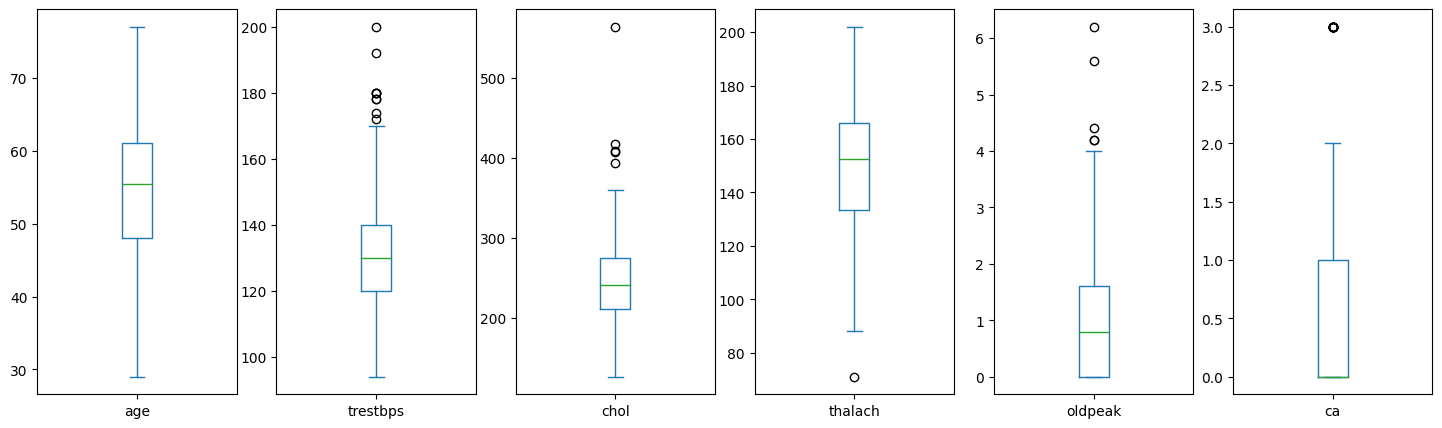

In [ ]:
# Mencari outlier data variabel numerik dengan menggunakan boxplot
df_clean[numeric].plot(subplots=True, kind='box', figsize=(18,5))
plt.show()


Dari visualisasi ini kita dapat melihat bahwa semua kolom numerik kecuali age memiliki outlier.

In [ ]:
# Menghitung nilai Q1, Q3, dan IQR
def quantile(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3-Q1
    lowerbound = Q1-1.5*IQR
    upperbound = Q3+1.5*IQR
    return lowerbound, upperbound

In [ ]:
# Menampilkan data outlier
lowerbound,upperbound=quantile(df_clean, numeric)
def detect_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3-Q1
    lowerbound = Q1-1.5*IQR
    upperbound = Q3+1.5*IQR
    return df[(df[col] < lowerbound) | (df[col] > upperbound)]

In [ ]:
detect_outliers(df_clean, 'trestbps')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
29,55,0,0,180,327,0,2,117,1,3.4,1,0.0,2.0,0
47,66,0,0,178,228,1,1,165,1,1.0,1,2.0,3.0,0
87,59,0,0,174,249,0,1,143,1,0.0,1,0.0,2.0,0
137,64,0,0,180,325,0,1,154,1,0.0,2,0.0,2.0,1
151,54,1,1,192,283,0,0,195,0,0.0,2,1.0,3.0,0
175,56,0,0,200,288,1,0,133,1,4.0,0,2.0,3.0,0
343,52,1,2,172,199,1,1,162,0,0.5,2,0.0,3.0,1
396,68,1,2,180,274,1,0,150,1,1.6,1,0.0,3.0,0
528,59,1,3,178,270,0,0,145,0,4.2,0,0.0,3.0,1


In [ ]:
detect_outliers(df_clean, 'chol')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
123,65,0,2,140,417,1,0,157,0,0.8,2,1.0,2.0,1
158,67,0,2,115,564,0,0,160,0,1.6,1,0.0,3.0,1
179,56,0,0,134,409,0,0,150,1,1.9,1,2.0,3.0,0
255,62,0,0,140,394,0,0,157,0,1.2,1,0.0,2.0,1
450,63,0,0,150,407,0,0,154,0,4.0,1,3.0,3.0,0


In [ ]:
detect_outliers(df_clean, 'thalach')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
267,67,1,0,120,237,0,1,71,0,1.0,1,0.0,2.0,0


In [ ]:
detect_outliers(df_clean, 'oldpeak')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
6,58,1,0,114,318,0,2,140,0,4.4,0,3.0,1.0,0
13,51,1,0,140,298,0,1,122,1,4.2,1,3.0,3.0,0
54,55,1,0,140,217,0,1,111,1,5.6,0,0.0,3.0,0
69,62,0,0,160,164,0,0,145,0,6.2,0,3.0,3.0,0
528,59,1,3,178,270,0,0,145,0,4.2,0,0.0,3.0,1


In [ ]:
detect_outliers(df_clean, 'ca')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
4,62,0,0,138,294,1,1,106,0,1.9,1,3.0,2.0,0
6,58,1,0,114,318,0,2,140,0,4.4,0,3.0,1.0,0
13,51,1,0,140,298,0,1,122,1,4.2,1,3.0,3.0,0
53,49,1,2,120,188,0,1,139,0,2.0,1,3.0,3.0,0
69,62,0,0,160,164,0,0,145,0,6.2,0,3.0,3.0,0
81,49,1,2,118,149,0,0,126,0,0.8,2,3.0,2.0,0
154,63,1,0,130,330,1,0,132,1,1.8,2,3.0,3.0,0
160,77,1,0,125,304,0,0,162,1,0.0,2,3.0,2.0,0
185,57,1,0,165,289,1,0,124,0,1.0,1,3.0,3.0,0
194,67,1,0,160,286,0,0,108,1,1.5,1,3.0,2.0,0


Akan dilakukan penghapusan pada kolom trestbps, chol, thalach, dan oldpeak. Khusus untuk kolom ca tidak akan ditindaklanjuti, karena nilai outliers merupakan semua data bernilai 3. Ketika outliers dihapus khawatir akan mempengaruhi korelasi terhadap target disease.

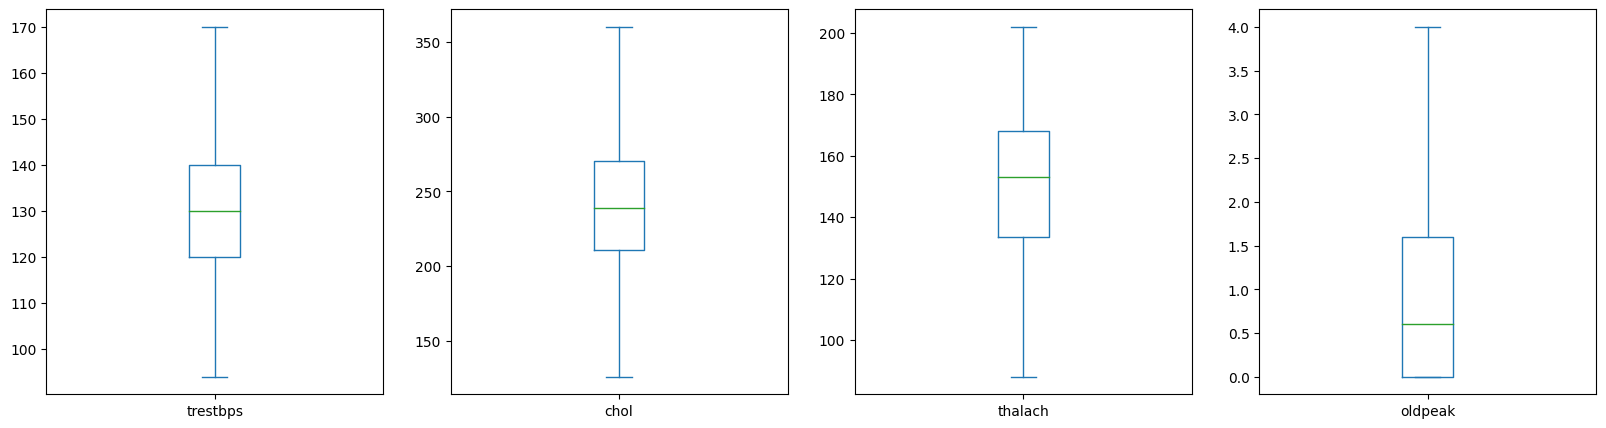

In [ ]:
# Menghapus outlier
outliers = ['trestbps', 'chol', 'thalach', 'oldpeak']
lowerbound1,upperbound1=quantile(df_clean, outliers)
df = df_clean[((df_clean[outliers] >= lowerbound1) & (df_clean[outliers] <= upperbound1)).all(axis='columns')]

# Menampilkan Boxplot yang outliernya sudah dihapus
df[outliers].plot(kind='box', subplots=True, figsize=(20,5))
plt.show()

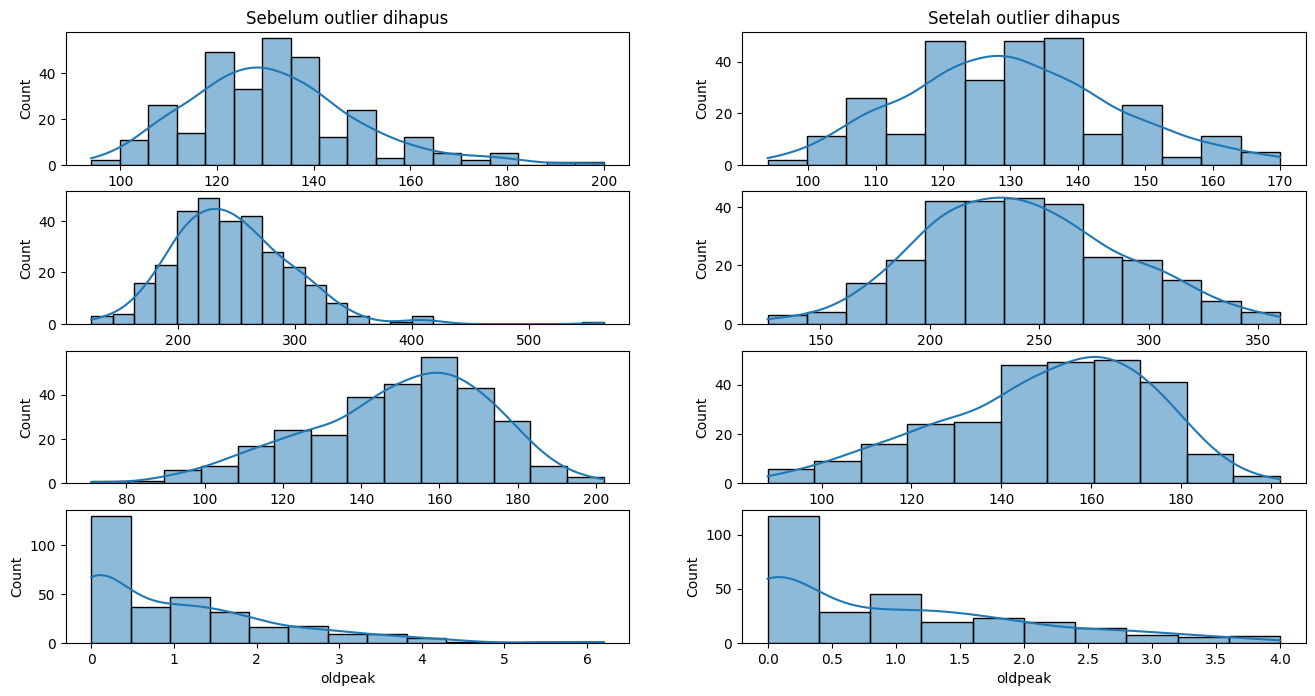

In [ ]:
# Perbandingan distribusi data sebelum dan setelah outlier dihapus
plt.figure(figsize=(16,10))
plt.subplot(5,2,1)
plt.title('Sebelum outlier dihapus')
sns.histplot(df_clean['trestbps'], kde=True)

plt.subplot(5,2,2)
plt.title('Setelah outlier dihapus')
sns.histplot(df['trestbps'], kde=True)

plt.subplot(5,2,3)
sns.histplot(df_clean['chol'], kde=True)

plt.subplot(5,2,4)
sns.histplot(df['chol'], kde=True)

plt.subplot(5,2,5)
sns.histplot(df_clean['thalach'], kde=True)

plt.subplot(5,2,6)
sns.histplot(df['thalach'], kde=True)

plt.subplot(5,2,7)
sns.histplot(df_clean['oldpeak'], kde=True)

plt.subplot(5,2,8)
sns.histplot(df['oldpeak'], kde=True)

plt.show()

#### Imbalance data

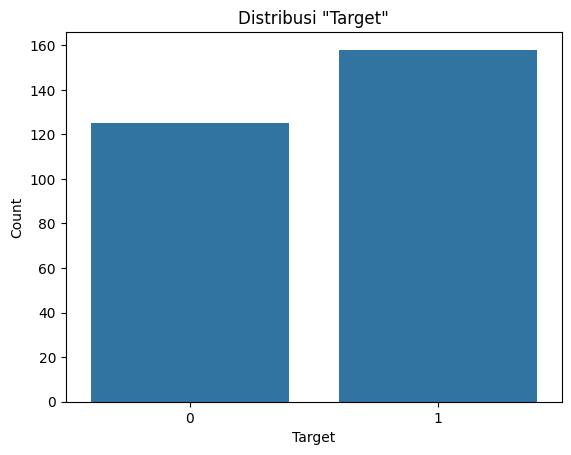

In [ ]:
# Cek imbalance data pada kolom 'Target'

target_counts = df['target'].value_counts()

# Plot distribusi target
sns.barplot(x=target_counts.index, y=target_counts.values)
plt.title('Distribusi "Target"')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

Karena kolom "Target" sudah cukup balance, maka tidak perlu handling imbalanced data.

#### Feature Engineering

##### hrt

Menghitung perkiraan detak jantung maksimum berdasarkan usia (hrt) dan melihat perbandingannya dengan detak jantung maksimum yang dicapai.

Sumber: [Target Heart Rate](https://www.cdc.gov/physicalactivity/basics/measuring/heartrate.htm#:~:text=To%20estimate%20your%20maximum%20age,x%200.64%20%3D%20109%20bpm%2C%20and)

In [ ]:
perkiraan_hitung = []

def perkiraan_detak_jantung(usia):
    for index, row in df.iterrows():
        perkiraan = 220 - row[usia]
        perkiraan_hitung.append(perkiraan)

perkiraan_detak_jantung('age')

df['hrt'] = perkiraan_hitung
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,hrt
0,52,1,0,125,212,0,1,168,0,1.0,2,2.0,3.0,0,168.0
1,53,1,0,140,203,1,0,155,1,3.1,0,0.0,3.0,0,167.0
2,70,1,0,145,174,0,1,125,1,2.6,0,0.0,3.0,0,150.0
3,61,1,0,148,203,0,1,161,0,0.0,2,1.0,3.0,0,159.0
4,62,0,0,138,294,1,1,106,0,1.9,1,3.0,2.0,0,158.0


##### compare_hrt_thalach

Klasifikasi:\
0 = Similar\
1 = Lower\
2 = Higher

In [ ]:
comparison = []
for index, row in df.iterrows():
  if row['thalach'] > row['hrt']:
    compare = 2
  elif row['thalach'] < row['hrt']:
    compare = 1
  else:
    compare = 0
  comparison.append(compare)

df['compare_hrt_thalach'] = comparison
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,hrt,compare_hrt_thalach
0,52,1,0,125,212,0,1,168,0,1.0,2,2.0,3.0,0,168.0,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0.0,3.0,0,167.0,1
2,70,1,0,145,174,0,1,125,1,2.6,0,0.0,3.0,0,150.0,1
3,61,1,0,148,203,0,1,161,0,0.0,2,1.0,3.0,0,159.0,2
4,62,0,0,138,294,1,1,106,0,1.9,1,3.0,2.0,0,158.0,1


#### Scaling

In [ ]:
# MinMaxScaler untuk data numerik
from sklearn.preprocessing import MinMaxScaler

numeric_col = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca', 'hrt']

scaler = MinMaxScaler()
df_scaled=df.copy()
df_scaled[numeric_col]=scaler.fit_transform(df[numeric_col])

df_scaled

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,hrt,compare_hrt_thalach
0,0.479167,1,0,0.407895,0.367521,0,1,0.701754,0,0.250,2,0.666667,3.0,0,0.520833,0
1,0.500000,1,0,0.605263,0.329060,1,0,0.587719,1,0.775,0,0.000000,3.0,0,0.500000,1
2,0.854167,1,0,0.671053,0.205128,0,1,0.324561,1,0.650,0,0.000000,3.0,0,0.145833,1
3,0.666667,1,0,0.710526,0.329060,0,1,0.640351,0,0.000,2,0.333333,3.0,0,0.333333,2
4,0.687500,0,0,0.578947,0.717949,1,1,0.157895,0,0.475,1,1.000000,2.0,0,0.312500,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,0.812500,0,2,0.342105,0.363248,0,0,0.236842,0,0.375,1,0.000000,2.0,1,0.187500,1
733,0.312500,0,2,0.184211,0.064103,0,1,0.763158,0,0.150,1,0.000000,2.0,1,0.687500,1
739,0.479167,1,0,0.447368,0.551282,0,1,0.640351,1,0.000,2,0.333333,3.0,0,0.520833,1
843,0.625000,1,3,0.868421,0.628205,0,0,0.324561,0,0.000,2,0.000000,2.0,0,0.375000,1


## Machine Learning

### Import Library

In [ ]:
# Modeling
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost.sklearn import XGBClassifier
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve

# Others
import warnings
warnings.filterwarnings("ignore")

### Split data

In [ ]:
y = df_scaled['target']
X = df_scaled.drop(columns=['target'])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape

(226, 15)

In [ ]:
X_test.shape

(57, 15)

### Modeling

Pada dataset heart disease akan dilakukan prediksi apakah seseorang mengidap penyakit jantung atau tidak berdasarkan feature-feature yang tersedia. Dalam hal ini, akan dilakukan pemodelan dengan supervised learning karena kumpulan data berlabel untuk melatih algoritma guna memprediksi hasil dan mengenali pola adalah berlabel.\
Pemilihan model awal dilakukan dengan menggunakan 5 model, yaitu Decision Tree, Random Forest, Logistic Regression, XGBoost, dan SVM.

In [ ]:
# Membuat model
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
xgb = XGBClassifier()
lr = LogisticRegression()
sv = svm.SVC()

# List model
models = [dt, rf, xgb, lr, sv]
model_names = ['Decision Tree', 'Random Forest', 'XGBoost', 'Logistic Regression', 'SVM']

# Dictionary untuk menyimpan hasil prediksi
y_preds = {}

# Melakukan fit training dan prediksi untuk setiap model
for model, name in zip(models, model_names):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_preds[name] = y_pred

### Cross-Validation

In [ ]:
# Train data cross validation
dt_cv = cross_val_score(dt, X_train, y_train)
rf_cv = cross_val_score(rf, X_train, y_train)
xgb_cv = cross_val_score(xgb, X_train, y_train)
lr_cv = cross_val_score(lr, X_train, y_train)
svm_cv = cross_val_score(sv, X_train, y_train)

# Menampilkan evaluation metrics
cv_score = [['%.2f' % elem for elem in dt_cv],
            ['%.2f' % elem for elem in rf_cv],
            ['%.2f' % elem for elem in xgb_cv],
            ['%.2f' % elem for elem in lr_cv],
            ['%.2f' % elem for elem in svm_cv]]
cv_mean = [dt_cv.mean(), rf_cv.mean(), xgb_cv.mean(), lr_cv.mean(), svm_cv.mean()]
cv_std = [dt_cv.std(), rf_cv.std(), xgb_cv.std(), lr_cv.std(), svm_cv.std()]

# DataFrame skor cv
cv_df = pd.DataFrame(data={
    'Model Name': model_names,
    'Mean of Accuracy': cv_mean,
    'Score of Accuracy': cv_score,
    'Std of Accuracy': cv_std
})

cv_df

,Model Name,Mean of Accuracy,Score of Accuracy,Std of Accuracy
0,Decision Tree,0.752560,"[0.67, 0.87, 0.73, 0.69, 0.80]",0.071944
1,Random Forest,0.814106,"[0.83, 0.80, 0.80, 0.84, 0.80]",0.018226
2,XGBoost,0.809662,"[0.83, 0.84, 0.80, 0.84, 0.73]",0.041494
3,Logistic Regression,0.840773,"[0.83, 0.91, 0.84, 0.82, 0.80]",0.037903
4,SVM,0.814300,"[0.78, 0.91, 0.73, 0.82, 0.82]",0.058409


Interpretasi:
* Skor akurasi paling tinggi model Logistic Regression dengan rata-rata akurasi 0.8408 (sekitar 84.08% dari data pengujian diprediksi dengan benar oleh model) dan standar deviasi 0.03790 (menunjukkan seberapa jauh data pengukuran dari rata-rata (0.8408)).
* Selanjutnya peringkat skor akurasi CV berturut-turut adalah Random Forest (mean 81.88%), SVM (mean 81.43%), XGB (mean 81.43%), dan terakhir adalah Decision Tree (74.81%)

Model Logistic Regression memiliki akurasi yang relatif tinggi dengan tingkat konsistensi yang baik dalam prediksi kelas pada data pengujian. Jadi, dari interpretasi ini, dapat disimpulkan bahwa model Logistic Regression memiliki kinerja yang lebih baik dibandingkan dengan keempat model lainnya dalam hal akurasi pada dataset yang digunakan.



### Learning curves

In [ ]:
train_sizes, dt_train, dt_test = learning_curve(dt, X, y, cv=5, scoring='accuracy')
dt_mean = np.mean(dt_train, axis=1)
dt_std = np.std(dt_train, axis=1)
dt_test_mean = np.mean(dt_test, axis=1)
dt_test_std = np.std(dt_test, axis=1)

train_sizes, rf_train, rf_test = learning_curve(rf, X, y, cv=5, scoring='accuracy')
rf_mean = np.mean(rf_train, axis=1)
rf_std = np.std(rf_train, axis=1)
rf_test_mean = np.mean(rf_test, axis=1)
rf_test_std = np.std(rf_test, axis=1)

train_sizes, xgb_train, xgb_test = learning_curve(xgb, X, y, cv=5, scoring='accuracy')
xgb_mean = np.mean(xgb_train, axis=1)
xgb_std = np.std(xgb_train, axis=1)
xgb_test_mean = np.mean(xgb_test, axis=1)
xgb_test_std = np.std(xgb_test, axis=1)

train_sizes, lr_train, lr_test = learning_curve(lr, X, y, cv=5, scoring='accuracy')
lr_mean = np.mean(lr_train, axis=1)
lr_std = np.std(lr_train, axis=1)
lr_test_mean = np.mean(lr_test, axis=1)
lr_test_std = np.std(lr_test, axis=1)

train_sizes, sv_train, sv_test = learning_curve(sv, X, y, cv=5, scoring='accuracy')
sv_mean = np.mean(sv_train, axis=1)
sv_std = np.std(sv_train, axis=1)
sv_test_mean = np.mean(sv_test, axis=1)
sv_test_std = np.std(sv_test, axis=1)

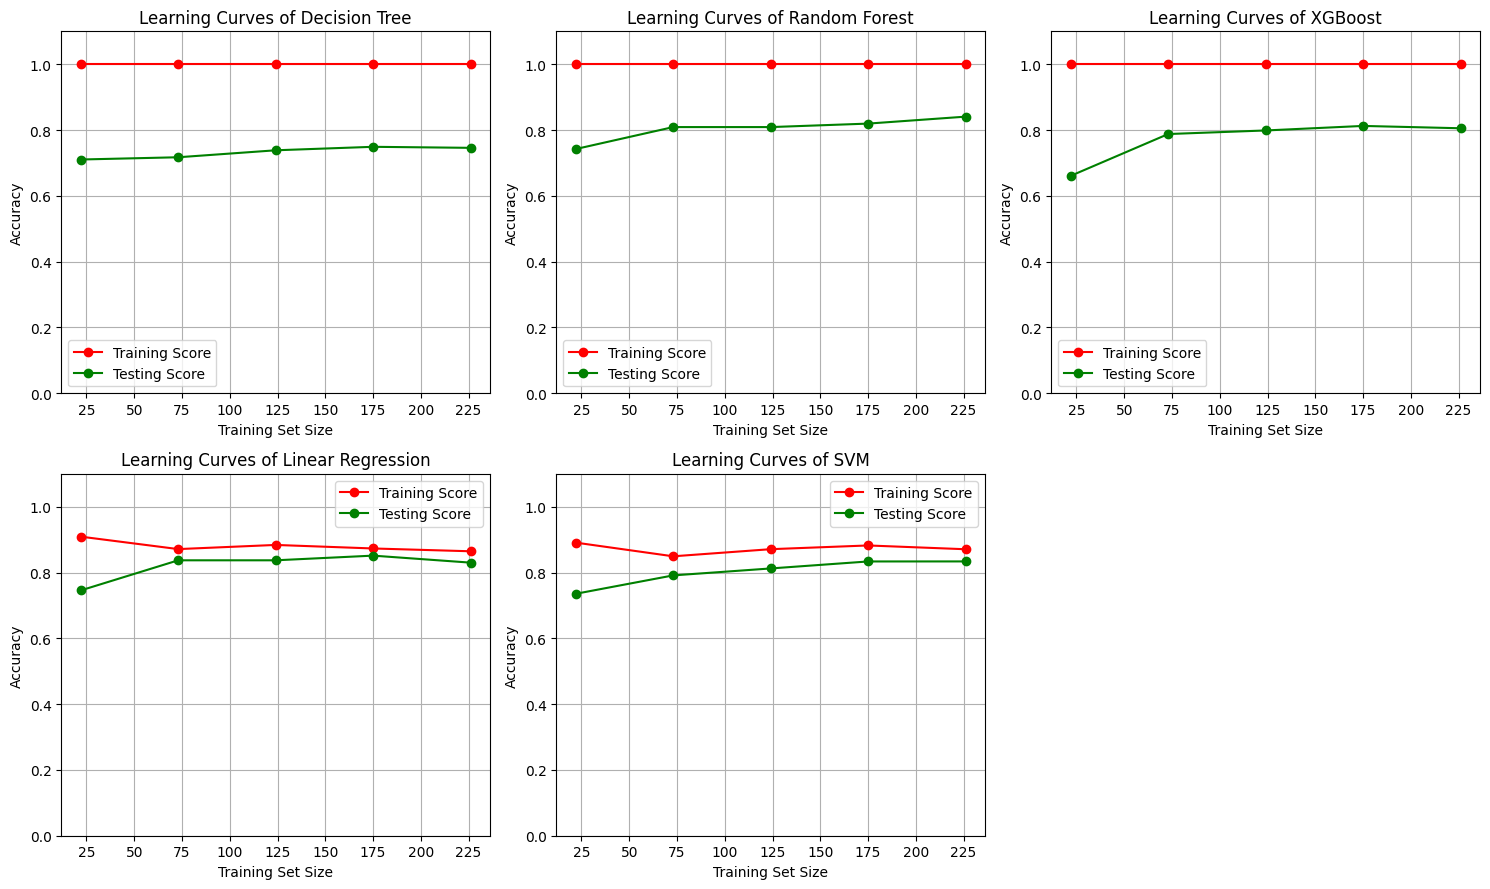

In [ ]:
import matplotlib.pyplot as plt

models = {
    'Decision Tree': (dt_mean, dt_test_mean),
    'Random Forest': (rf_mean, rf_test_mean),
    'XGBoost': (xgb_mean, xgb_test_mean),
    'Linear Regression': (lr_mean, lr_test_mean),
    'SVM': (sv_mean, sv_test_mean)
}

plt.figure(figsize=(15, 9))

for model, (train_mean, test_mean) in models.items():
    plt.subplot(2, 3, list(models.keys()).index(model)+1)
    plt.title(f'Learning Curves of {model}')
    plt.xlabel('Training Set Size')
    plt.ylabel('Accuracy')
    plt.grid()
    plt.plot(train_sizes, train_mean, '-o', color='r', label='Training Score')
    plt.plot(train_sizes, test_mean, '-o', color='g', label='Testing Score')
    plt.ylim(0,1.1)
    plt.legend(loc='best')

plt.tight_layout()
plt.show()

Interpretasi:

* Decision Tree, Random Forest, dan XGB: Overfit, training score tinggi tetapi testing score tidak pernah naik menghampiri training score atau dalam kata lain jarak antara training score dan testing score cukup tinggi.

* Logistic Regression: Underfit, training score menurun seiring meningkatnya banyak data. Akan tetapi, perbedaan antara training score dan testing score tidak terlalu jauh.

* Support Vector Machine: Good fit, training score menurun sampai titik banyak data 75, setelah itu training score dan testing score melaju searah dengan gap yang tidak terlalu jauh.

### Hyperparameter Tuning

Dari kelima model dipilih dua model, yaitu Logistic Regression dan SVM. Logistic Regression memiliki akurasi yang paling tinggi dari kelima model tetapi memiliki model yang underfit. Sedangkan, akurasi untuk model SVM adalah di bawah Logistic Regression tetapi memiliki learning curves yang good fit. Akan dilakukan hyperparameter tuning terhadap model dengan menggunakan metode Grid Search.

In [ ]:
# Hyperparameter tuning for Logistic Regression
param_dist_lr = {
    'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000, 2500, 5000]
}
grid_lr = GridSearchCV(LogisticRegression(), param_dist_lr, verbose = 3, cv=5)
grid_lr.fit(X,y)

Streaming output truncated to the last 5000 lines.
[CV 1/5] END C=0.08858667904100823, max_iter=2500, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=0.08858667904100823, max_iter=2500, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=0.08858667904100823, max_iter=2500, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=0.08858667904100823, max_iter=2500, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=0.08858667904100823, max_iter=2500, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5] END C=0.08858667904100823, max_iter=2500, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=0.08858667904100823, max_iter=2500, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=0.08858667904100823, max_iter=2500, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=0.08858667904100823, max_iter=2500, penalty=l1, solver=newton-cg;,

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'max_iter': [100, 1000, 2500, 5000],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['lbfgs', 'newton-cg', 'liblinear', 'sag',
                                    'saga']},
             verbose=3)

In [ ]:
# Hyperparameter tuning for SVM
param_dist_svm = {
    'C': [0.1, 1, 10, 100, 1000],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    'kernel': ['rbf']
}
grid_svm = GridSearchCV(svm.SVC(), param_dist_svm, verbose = 3)
grid_svm.fit(X,y)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.614 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.632 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.702 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.661 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.607 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.807 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.807 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.912 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.786 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.786 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.561 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [ ]:
# Menampilkan best parameter and score
print("\nBest parameters for Logistic Regression:", grid_lr.best_params_)
print("Best accuracy score for Logistic Regression:", grid_lr.best_score_)

print("\nBest parameters for SVM:", grid_svm.best_params_)
print("Best accuracy score for SVM:", grid_svm.best_score_)


Best parameters for Logistic Regression: {'C': 0.615848211066026, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Best accuracy score for Logistic Regression: 0.8617794486215539

Best parameters for SVM: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
Best accuracy score for SVM: 0.8479323308270675


### Remodeling

In [ ]:
# Remodeling
lr_tuned = LogisticRegression(**grid_lr.best_params_)
sv_tuned = svm.SVC(**grid_svm.best_params_)

# Train data
lr_tuned_cv = cross_val_score(lr_tuned, X_train, y_train)
sv_tuned_cv = cross_val_score(sv_tuned, X_train, y_train)

# Show evaluation metrics
cv_tuned_score = [
    ['%.2f' % elem for elem in lr_tuned_cv],
    ['%.2f' % elem for elem in sv_tuned_cv]
]
cv_tuned_mean = [lr_tuned_cv.mean(), sv_tuned_cv.mean()]
cv_tuned_std = [lr_tuned_cv.std(), sv_tuned_cv.std()]

param_after_tuning = pd.DataFrame(data={
    'Model Name': ['Logistic Regression', 'SVM'],
    'Mean of Accuracy': cv_tuned_mean,
    'Score of Accuracy': cv_tuned_score,
    'Std of Accuracy': cv_tuned_std
})
param_after_tuning

,Model Name,Mean of Accuracy,Score of Accuracy,Std of Accuracy
0,Logistic Regression,0.818454,"[0.85, 0.89, 0.80, 0.78, 0.78]",0.043528
1,SVM,0.840870,"[0.80, 0.89, 0.82, 0.84, 0.84]",0.028330


In [ ]:
# CV Score sebelum tuning
cv_df[3:]

,Model Name,Mean of Accuracy,Score of Accuracy,Std of Accuracy
3,Logistic Regression,0.840773,"[0.83, 0.91, 0.84, 0.82, 0.80]",0.037903
4,SVM,0.814300,"[0.78, 0.91, 0.73, 0.82, 0.82]",0.058409


Rata-rata skor akurasi model Logistic Regression menurun setelah dilakukan hyperparameter tuning sedangkan rata-rata skor akurasi model SVM menaik.

In [ ]:
train_sizes, lr_tuned_train, lr_tuned_test = learning_curve(lr_tuned, X, y, cv=5, scoring='accuracy')
lr_tuned_mean = np.mean(lr_tuned_train, axis=1)
lr_tuned_std = np.std(lr_tuned_train, axis=1)
lr_tuned_test_mean = np.mean(lr_tuned_test, axis=1)
lr_tuned_test_std = np.std(lr_tuned_test, axis=1)

train_sizes, sv_tuned_train, sv_tuned_test = learning_curve(sv_tuned, X, y, cv=5, scoring='accuracy')
sv_tuned_mean = np.mean(sv_tuned_train, axis=1)
sv_tuned_std = np.std(sv_tuned_train, axis=1)
sv_tuned_test_mean = np.mean(sv_tuned_test, axis=1)
sv_tuned_test_std = np.std(sv_tuned_test, axis=1)

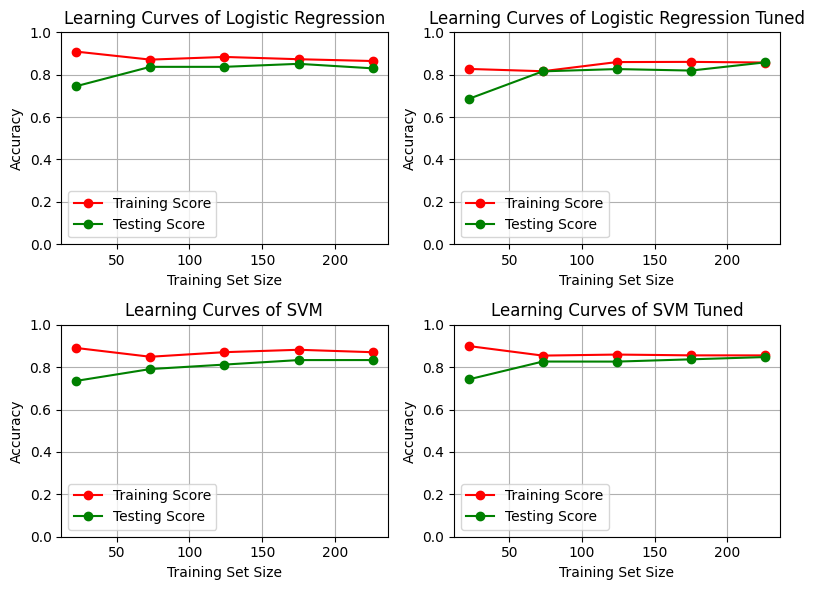

In [ ]:
# Define models and respective data
models = ["Logistic Regression", "Logistic Regression Tuned",
          "SVM", "SVM Tuned"]
train_mean = [lr_mean, lr_tuned_mean,
              sv_mean, sv_tuned_mean]
test_mean = [lr_test_mean, lr_tuned_test_mean,
             sv_test_mean, sv_tuned_test_mean]
train_std = [lr_test_mean, lr_tuned_std,
             sv_test_mean, sv_tuned_std]
test_std = [lr_test_std, lr_tuned_test_std,
            sv_test_std, sv_tuned_test_std]

# Membuat figure dan subplot grid
fig, axs = plt.subplots(2, 2, figsize=(8, 6))

# Flatten subplot grid untuk memudahkan iterasi
axs = axs.flatten()

# Iterasi model dan plot learning curves
for i, model in enumerate(models):
    ax = axs[i]
    ax.set_title(f'Learning Curves of {model}')
    ax.set_xlabel('Training Set Size')
    ax.set_ylabel('Accuracy')
    ax.grid()
    ax.plot(train_sizes, train_mean[i], '-o', color='r', label='Training Score')
    ax.plot(train_sizes, test_mean[i], '-o', color='g', label='Testing Score')
    ax.set_ylim(0,1)
    ax.legend(loc='best')

for ax in axs[len(models):]:
    ax.axis('off')

plt.tight_layout()
plt.show()

Setelah dilakukan hyperparameter tuning, learning curves model Logistic Regression yang ditampilkan adalah tetap underfit, hanya saja perbedaan jarak antara training score dan testing score lebih kecil daripada sebelum tuning. Sedangkan, learning curves yang ditampilkan pada model SVM setelah tuning adalah underfit tetapi cukup stabil saat data semakin banyak.

### Confusion Matrix

Metric evaluation menggunakan confusion matrix dipilih untuk membantu dalam merepresentasikan tingkat kepercayaan diri model. Confusion matrix juga memberikan gambaran yang komprehensif tentang kinerja model klasifikasi dengan memperlihatkan jumlah prediksi yang benar dan salah untuk setiap kelas.

##### Classification report Logistic Regression

In [ ]:
# Fit data train tuned model
lr_tuned.fit(X_train, y_train)
sv_tuned.fit(X_train,y_train)

# Pred data test tuned model
y_pred_lr_tuned = lr_tuned.predict(X_test)
y_pred_svm_tuned = sv_tuned.predict(X_test)

In [ ]:
# Membuat classification report
print('Logistic Regression Model')
print('### Testing Results Before Tuning ###\n')
print(classification_report(y_test, y_preds['Logistic Regression']), '\n')

print('### Testing Results After Tuning ###\n')
print(classification_report(y_test, y_pred_lr_tuned), '\n')

Logistic Regression Model
### Testing Results Before Tuning ###

              precision    recall  f1-score   support

           0       0.87      0.77      0.82        26
           1       0.82      0.90      0.86        31

    accuracy                           0.84        57
   macro avg       0.85      0.84      0.84        57
weighted avg       0.84      0.84      0.84        57
 

### Testing Results After Tuning ###

              precision    recall  f1-score   support

           0       0.81      0.81      0.81        26
           1       0.84      0.84      0.84        31

    accuracy                           0.82        57
   macro avg       0.82      0.82      0.82        57
weighted avg       0.82      0.82      0.82        57
 



###### Interpretasi classification report before tuning

Precision:
* Sebanyak 87% data pasien yang tidak mengidap penyakit jantung diprediksi benar
* Sebanyak 82% data pasien yang mengidap penyakit jantung diprediksi benar

Recall:
* Sebanyak 77% pasien diprediksi tidak mengidap penyakit jantung dibandingkan keseluruhan pasien yang sebenarnya tidak mengidap penyakit jantung.
* Sebanyak 90% pasien diprediksi mengidap penyakit jantung dibandingkan keseluruhan pasien yang sebenarnya mengidap penyakit jantung.

F-1 Score:
* Harmonic mean antara precision dan recall kelas pasien yang tidak mengidap penyakit jantung adalah 0.82.
* Harmonic mean antara precision dan recall kelas pasien yang tidak mengidap penyakit jantung adalah 0.86.
Kedua F-1 score memiliki nilai yang cukup tinggi, artinya model klasifikasi model ini memiliki precision dan recall yang baik.

Support:
* Ada sebanyak 26 data pasien yang tidak mengidap penyakit jantung.
* Ada sebanyak 31 data pasien yang mengidap penyakit jantung.
Artinya, testing data well balanced.

###### Interpretasi classification report after tuning

Precision:
* Sebanyak 81% data pasien yang tidak mengidap penyakit jantung diprediksi benar
* Sebanyak 84% data pasien yang mengidap penyakit jantung diprediksi benar

Recall:
* Sebanyak 81% pasien diprediksi tidak mengidap penyakit jantung dibandingkan keseluruhan pasien yang sebenarnya tidak mengidap penyakit jantung.
* Sebanyak 84% pasien diprediksi mengidap penyakit jantung dibandingkan keseluruhan pasien yang sebenarnya mengidap penyakit jantung.

F-1 Score:
* Harmonic mean antara precision dan recall kelas pasien yang tidak mengidap penyakit jantung adalah 0.81.
* Harmonic mean antara precision dan recall kelas pasien yang tidak mengidap penyakit jantung adalah 0.84.
Kedua F-1 score memiliki nilai yang cukup tinggi, artinya model klasifikasi model ini memiliki precision dan recall yang baik. Tapi tidak sebaik model sebelumnya.

Support:
* Ada sebanyak 26 data pasien yang tidak mengidap penyakit jantung.
* Ada sebanyak 31 data pasien yang mengidap penyakit jantung.
Artinya, testing data well balanced.

##### Classification report SVM

In [ ]:
# Membuat classification report
print('SVM Model')
print('### Testing Results Before Tuning ###\n')
print(classification_report(y_test, y_preds['SVM']), '\n')

print('### Testing Results After Tuning ###\n')
print(classification_report(y_test, y_pred_svm_tuned), '\n')

SVM Model
### Testing Results Before Tuning ###

              precision    recall  f1-score   support

           0       0.83      0.77      0.80        26
           1       0.82      0.87      0.84        31

    accuracy                           0.82        57
   macro avg       0.83      0.82      0.82        57
weighted avg       0.83      0.82      0.82        57
 

### Testing Results After Tuning ###

              precision    recall  f1-score   support

           0       0.87      0.77      0.82        26
           1       0.82      0.90      0.86        31

    accuracy                           0.84        57
   macro avg       0.85      0.84      0.84        57
weighted avg       0.84      0.84      0.84        57
 



###### Interpretasi classification report before tuning

Precision:
* Sebanyak 83% data pasien yang tidak mengidap penyakit jantung diprediksi benar
* Sebanyak 82% data pasien yang mengidap penyakit jantung diprediksi benar

Recall:
* Sebanyak 77% pasien diprediksi tidak mengidap penyakit jantung dibandingkan keseluruhan pasien yang sebenarnya tidak mengidap penyakit jantung.
* Sebanyak 87% pasien diprediksi mengidap penyakit jantung dibandingkan keseluruhan pasien yang sebenarnya mengidap penyakit jantung.

F-1 Score:
* Harmonic mean antara precision dan recall kelas pasien yang tidak mengidap penyakit jantung adalah 0.80.
* Harmonic mean antara precision dan recall kelas pasien yang tidak mengidap penyakit jantung adalah 0.84.
Kedua F-1 score memiliki nilai yang cukup tinggi, artinya model klasifikasi model ini memiliki precision dan recall yang baik.

Support:
* Ada sebanyak 26 data pasien yang tidak mengidap penyakit jantung.
* Ada sebanyak 31 data pasien yang mengidap penyakit jantung.
Artinya, testing data well balanced.

###### Interpretasi classification report after tuning

Precision:
* Sebanyak 87% data pasien yang tidak mengidap penyakit jantung diprediksi benar
* Sebanyak 82% data pasien yang mengidap penyakit jantung diprediksi benar

Recall:
* Sebanyak 77% pasien diprediksi tidak mengidap penyakit jantung dibandingkan keseluruhan pasien yang sebenarnya tidak mengidap penyakit jantung.
* Sebanyak 90% pasien diprediksi mengidap penyakit jantung dibandingkan keseluruhan pasien yang sebenarnya mengidap penyakit jantung.

F-1 Score:
* Harmonic mean antara precision dan recall kelas pasien yang tidak mengidap penyakit jantung adalah 0.82.
* Harmonic mean antara precision dan recall kelas pasien yang tidak mengidap penyakit jantung adalah 0.86.
Kedua F-1 score memiliki nilai yang cukup tinggi, artinya model klasifikasi model ini memiliki precision dan recall lebih baik dari model sebelumnya.

Support:
* Ada sebanyak 26 data pasien yang tidak mengidap penyakit jantung.
* Ada sebanyak 31 data pasien yang mengidap penyakit jantung.
Artinya, testing data well balanced.

#### Confusion Matrix

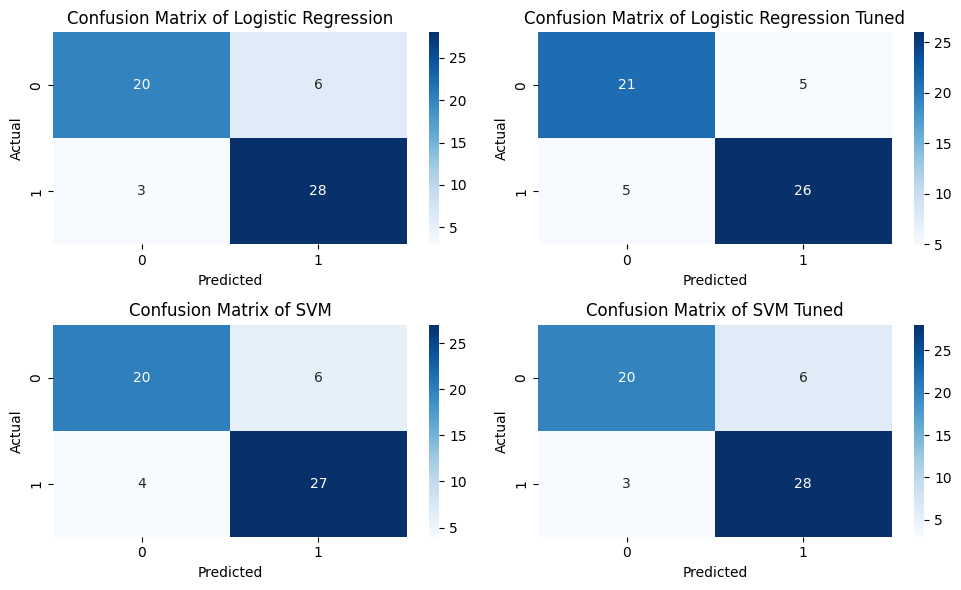

In [ ]:
# Confusion matrix
matrix_models = ['Logistic Regression', 'Logistic Regression Tuned', 'SVM', 'SVM Tuned']
pred = [y_preds['Logistic Regression'], y_pred_lr_tuned, y_preds['SVM'], y_pred_svm_tuned]

# Membuat figure dan subplot grid
fig, axs = plt.subplots(2, 2, figsize=(10, 6))

# Flatten subplot grid untuk memudahkan iterasi
axs = axs.flatten()

# Iterasi model dan plot confusion matrices
for i, model in enumerate(matrix_models):
    ax = axs[i]
    matrix = confusion_matrix(y_test, pred[i])
    sns.heatmap(matrix, annot=True, fmt="d", cmap="Blues", ax=ax)
    ax.set_title(f'Confusion Matrix of {model}')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')

# Menghilangkan axis untuk subplot tambahan jika ada
for ax in axs[len(matrix_models):]:
    ax.axis('off')

plt.tight_layout()
plt.show()

###### Interpretasi Confusion Matric Model Logistic Regression

Interpretasi Confusion Matrix of Logistic Regression sebelum Tuning:
1. True Negative (TN): Model memprediksi 20 pasien tidak mengidap penyakit jantung dan memang kenyataannya, pasien itu tidak mengidap penyakit jantung.
2. True Positive (TP): Model memprediksi 28 pasien mengidap penyakit jantung dan memang kenyataannya, pasien itu mengidap penyakit jantung.
3. False Negative (FN): Model memprediksi 6 pasien tidak mengidap penyakit jantung, padahal pasien mengidap penyakit jantung.
4. False Positive (FP): Model memprediksi 3 pasien mengidap penyakit jantung, padahal pasien tidak mengidap penyakit jantung.

Interpretasi Confusion Matrix of Logistic Regression setelah Tuning:
1. True Negative (TN): Model memprediksi 21 pasien tidak mengidap penyakit jantung dan memang kenyataannya, pasien itu tidak mengidap penyakit jantung.
2. True Positive (TP): Model memprediksi 26 pasien mengidap penyakit jantung dan memang kenyataannya, pasien itu mengidap penyakit jantung.
3. False Negative (FN): Model memprediksi 5 pasien tidak mengidap penyakit jantung, padahal pasien mengidap penyakit jantung.
4. False Positive (FP): Model memprediksi 5 pasien mengidap penyakit jantung, padahal pasien tidak mengidap penyakit jantung.

Terdapat penambahan error tipe 1 saat setelah tuning yaitu pada awalnya model memprediksi 3 pasien mengidap penyakit jantung padahal pasien tidak mengidap penyakit jantung, dan setelah tuning menjadi 5 pasien. Akurasi yang diberikan model sebelum tuning adalah 84% sedangkan setelah tuning adalah 82%.

###### Interpretasi Confusion Matric Model SVM

Interpretasi Confusion Matrix of SVM sebelum Tuning:
1. True Negative (TN): Model memprediksi 20 pasien tidak mengidap penyakit jantung dan memang kenyataannya, pasien itu tidak mengidap penyakit jantung.
2. True Positive (TP): Model memprediksi 27 pasien mengidap penyakit jantung dan memang kenyataannya, pasien itu mengidap penyakit jantung.
3. False Negative (FN): Model memprediksi 6 pasien tidak mengidap penyakit jantung, padahal pasien mengidap penyakit jantung.
4. False Positive (FP): Model memprediksi 4 pasien mengidap penyakit jantung, padahal pasien tidak mengidap penyakit jantung.

Interpretasi Confusion Matrix of Logistic Regression setelah Tuning:
1. True Negative (TN): Model memprediksi 20 pasien tidak mengidap penyakit jantung dan memang kenyataannya, pasien itu tidak mengidap penyakit jantung.
2. True Positive (TP): Model memprediksi 28 pasien mengidap penyakit jantung dan memang kenyataannya, pasien itu mengidap penyakit jantung.
3. False Negative (FN): Model memprediksi 6 pasien tidak mengidap penyakit jantung, padahal pasien mengidap penyakit jantung.
4. False Positive (FP): Model memprediksi 3 pasien mengidap penyakit jantung, padahal pasien tidak mengidap penyakit jantung.

Terdapat pengurangan error tipe 1 saat setelah tuning yaitu pada awalnya model memprediksi 4 pasien mengidap penyakit jantung padahal pasien tidak mengidap penyakit jantung, dan setelah tuning menjadi 3 pasien. Akurasi yang diberikan model sebelum tuning adalah 82% sedangkan setelah tuning adalah 84%.

### Kesimpulan

Model yang digunakan untuk klasifikasi dataset Heart Disease adalah SVM dengan akurasi sebagai berikut:

In [ ]:
acc = pd.DataFrame(data={
    'SVM Model':[' Before Tuning', ' After Tuning'],
    'Mean of CV Accuracy': [svm_cv.mean(), sv_tuned_cv.mean()],
    'Accuracy of Classification Score' : [accuracy_score(y_test, y_preds['SVM']),
                                           accuracy_score(y_test, y_pred_svm_tuned)]
})
acc

,SVM Model,Mean of CV Accuracy,Accuracy of Classification Score
0,Before Tuning,0.81430,0.824561
1,After Tuning,0.84087,0.842105


In [ ]:
print("\nBest parameters for SVM:", grid_svm.best_params_)


Best parameters for SVM: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}


Rata-rata akurasi cross-validation setelah tuning meningkat dibandingkan dengan sebelum tuning, begitu pula untuk akurasi classification score. Dengan demikian, model SVM dengan tuning sudah cukup baik dalam memprediksi pasien apakah mengidap penyakit jantung atau tidak.